### Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


### Dataset Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


#### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Importing the dataset

In [2]:
df=pd.read_csv(r'F:\Internship - Data Science\Malignant Comments Classifier Project\train.csv')  #train dataset
df1=pd.read_csv(r'F:\Internship - Data Science\Malignant Comments Classifier Project\test.csv')  #test dataset

In [3]:
df.head()  #first 5 rows of the train dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df1.head() #first 5 rows of the test dataset

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
df.tail()   #last 5 rows of the train dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [6]:
df1.tail()  #last five rows of the dataset

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


In [7]:
df.shape

(159571, 8)

It contains 159571 rows and 8 columns

In [8]:
df1.shape

(153164, 2)

It contains 153164 rows and 2 columns 

In [9]:
print(df.info())  #a brief info for both the dataset
print('\n')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


In [10]:
print(df.dtypes)  #datatypes of each column in each dataset
print('\n')
print(df1.dtypes)

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


id              object
comment_text    object
dtype: object


In [11]:
print(df.nunique())   #unique values in each column
print('\n')
print(df1.nunique())

id                  159571
comment_text        159570
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64


id              153164
comment_text    153164
dtype: int64


#### Null Values in both dataset

In [12]:
print('Null Values in training set')
print('\n')
print(df.isnull().sum())
print('Null Values in test set')
print('\n')
print(df1.isnull().sum())

Null Values in training set


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
Null Values in test set


id              0
comment_text    0
dtype: int64


No null values present in the dataset

<AxesSubplot:>

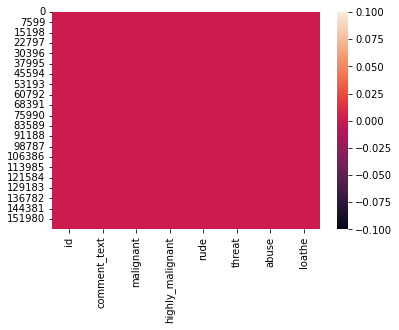

In [13]:
sns.heatmap(df.isnull())

<AxesSubplot:>

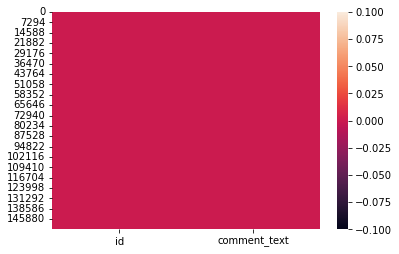

In [14]:
sns.heatmap(df1.isnull())

In [15]:
cols=['malignant','highly_malignant','rude','threat','abuse','loathe']

In [16]:
for i in cols:  #printing the value count in each column
    print(df[i].value_counts())
    print('\n')

0    144277
1     15294
Name: malignant, dtype: int64


0    157976
1      1595
Name: highly_malignant, dtype: int64


0    151122
1      8449
Name: rude, dtype: int64


0    159093
1       478
Name: threat, dtype: int64


0    151694
1      7877
Name: abuse, dtype: int64


0    158166
1      1405
Name: loathe, dtype: int64




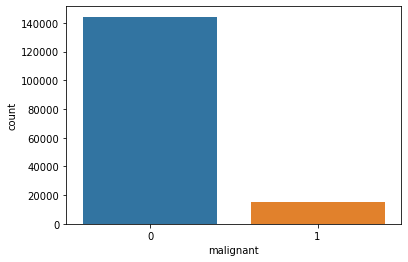

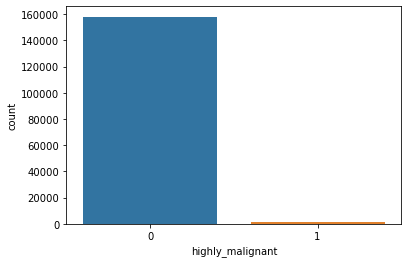

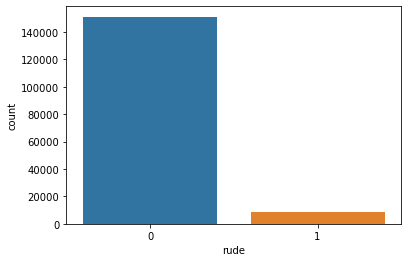

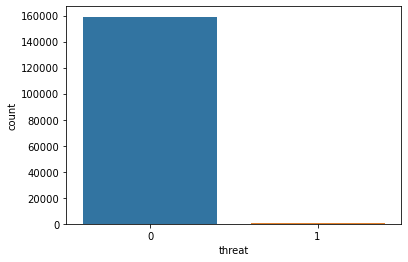

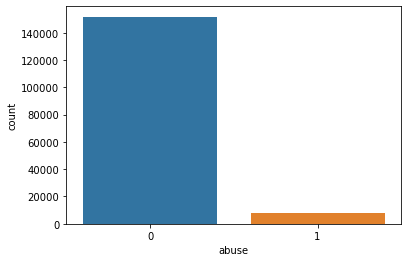

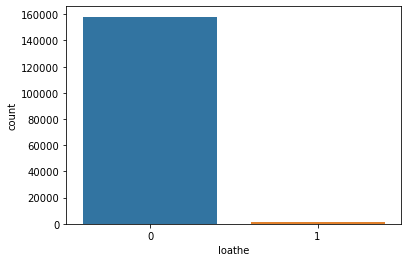

In [17]:
#plotting the diiferent columns value countsb

for i in cols:
    sns.countplot(df[i])
    plt.show()

More of the comments are simple not fall in any of the category

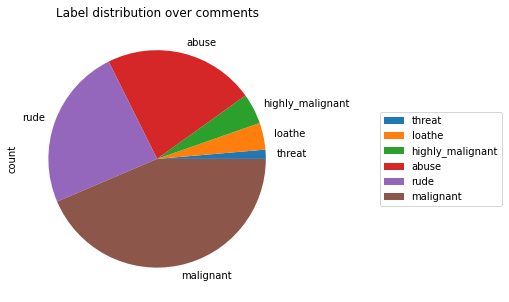

In [30]:
df_distribution = df[cols].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

We have a very high ratio of malignant comments followed by rude and abuse

In [18]:
import string

In [19]:
df['length'] = df['comment_text'].str.len()  #chcecking the length of the comment text
df.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [20]:
# Replacing '\n' with ' '

df.comment_text = df.comment_text.str.replace('\n',' ')

from nltk.tokenize import regexp_tokenize

# Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc

df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [21]:
df['clean_length'] = df.comment_text.str.len()  #Checking the length of the comment after clearing
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,xplanation hy the edits made under my username...,0,0,0,0,0,0,264,229
1,000103f0d9cfb60f,'aww e matches this background colour 'm seemi...,0,0,0,0,0,0,112,79
2,000113f07ec002fd,ey man 'm really not trying to edit war t's ju...,0,0,0,0,0,0,233,225
3,0001b41b1c6bb37e,ore can't make any real suggestions on improve...,0,0,0,0,0,0,622,585
4,0001d958c54c6e35,ou sir are my hero ny chance you remember what...,0,0,0,0,0,0,67,61


In [22]:
# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 62797479
Clean Length 56139334


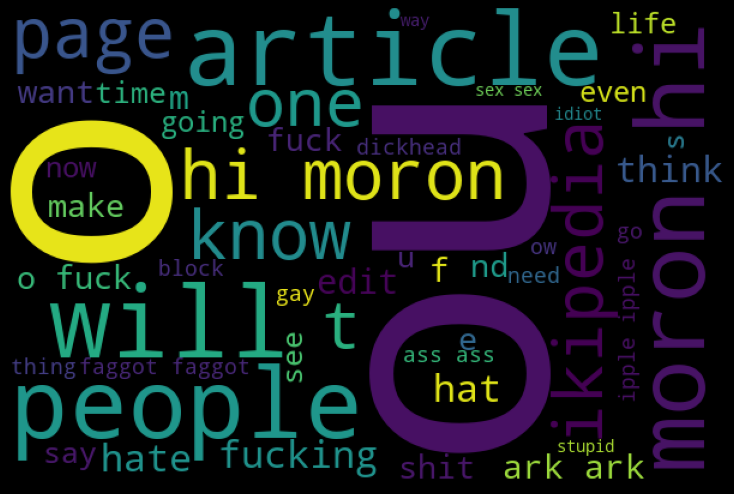

In [23]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['comment_text'][df['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Statistical Summary

In [24]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,393.539421,351.814139
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,589.804780,530.032028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,81.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,182.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,434.500000,393.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,5000.000000


#### Correlation

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   
length            -0.054649          0.009747 -0.043097 -0.007909 -0.045239   
clean_length      -0.078878         -0.022518 -0.063586 -0.017325 -0.064501   

                    loathe    length  clean_length  
malignant         0.266009 -0.054649     -0.078878  
highly_malignant  0.201600  0.009747     -0.022518  
rude              0.286867 -0.043097     -0.063586  
threat            0.115128 -0.007909     -0.017325  
abuse             0.337

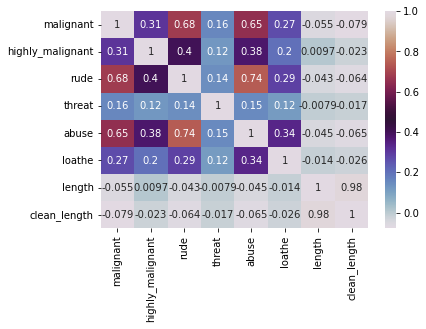

In [25]:
corr=df.corr()
print(corr)
print(sns.heatmap(corr, cmap='twilight',annot=True))

#### Checking the skewness

In [26]:
df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
length               4.124587
clean_length         4.082813
dtype: float64

#### Plotting the outliers

malignant              AxesSubplot(0.125,0.749828;0.352273x0.130172)
highly_malignant    AxesSubplot(0.547727,0.749828;0.352273x0.130172)
rude                   AxesSubplot(0.125,0.593621;0.352273x0.130172)
threat              AxesSubplot(0.547727,0.593621;0.352273x0.130172)
abuse                  AxesSubplot(0.125,0.437414;0.352273x0.130172)
loathe              AxesSubplot(0.547727,0.437414;0.352273x0.130172)
length                 AxesSubplot(0.125,0.281207;0.352273x0.130172)
clean_length        AxesSubplot(0.547727,0.281207;0.352273x0.130172)
dtype: object

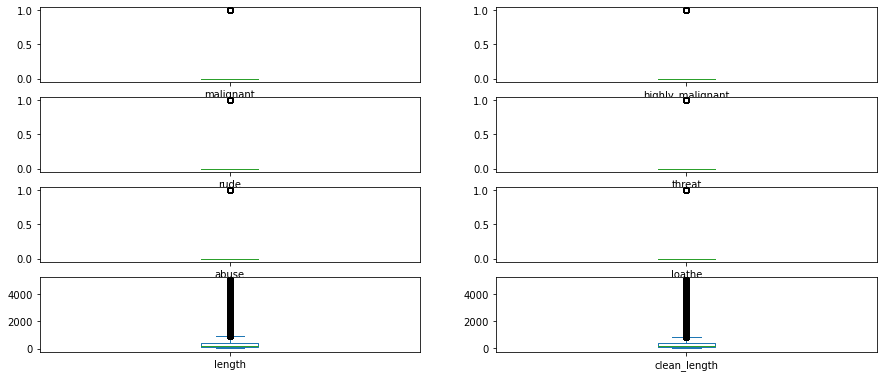

In [27]:
df.plot(kind='box',subplots=True,layout=(5,2),figsize=(15,8))

#### Model Building

#### Importing the libraries

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [31]:
#combining all the target columns into one

df['bad'] =df[cols].sum(axis =1)
print(df['bad'].value_counts())
df['bad'] = df['bad'] > 0 
df['bad'] = df['bad'].astype(int)
print(df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


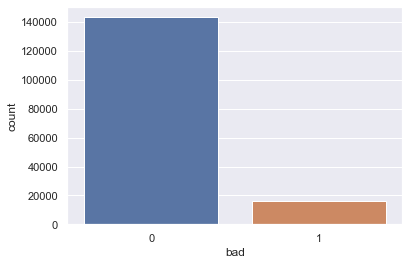

In [32]:
sns.set()
sns.countplot(x="bad" , data = df)
plt.show()

Most of the comments are not fall in the bad category

In [33]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['comment_text'])
x = features

In [34]:
y=df['bad']

In [35]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()

#### Finding the best random state

In [35]:
model=[lg,rdc,svc,dtc,knc,ad,gb]
maxAccu=0
bestRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.9485503008021391 on random state 47


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=.30)

#### Logistic Regression

In [49]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred1))
print('Classification Report: ','\n',classification_report(y_test,pred1))

Accuracy Score:  0.9485503008021391
Confusion Matrix:  
 [[42844   213]
 [ 2250  2565]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     43057
           1       0.92      0.53      0.68      4815

    accuracy                           0.95     47872
   macro avg       0.94      0.76      0.82     47872
weighted avg       0.95      0.95      0.94     47872



#### Decision Tree Calssifier

In [38]:
dtc.fit(x_train,y_train)
pred2=dtc.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred2))
print('Classification Report: ','\n',classification_report(y_test,pred2))

Accuracy Score:  0.9198696524064172
Confusion Matrix:  
 [[40706  2351]
 [ 1485  3330]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     43057
           1       0.59      0.69      0.63      4815

    accuracy                           0.92     47872
   macro avg       0.78      0.82      0.79     47872
weighted avg       0.93      0.92      0.92     47872



#### Random Forest Classifier

In [40]:
rdc.fit(x_train,y_train)
pred4=rdc.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred4))
print('Classification Report: ','\n',classification_report(y_test,pred4))

Accuracy Score:  0.9454169451871658
Confusion Matrix:  
 [[42045  1012]
 [ 1601  3214]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     43057
           1       0.76      0.67      0.71      4815

    accuracy                           0.95     47872
   macro avg       0.86      0.82      0.84     47872
weighted avg       0.94      0.95      0.94     47872



#### KNN Classifier

In [36]:
knc.fit(x_train,y_train)
pred5=knc.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred5))
print('Classification Report: ','\n',classification_report(y_test,pred5))

Accuracy Score:  0.5836397058823529
Confusion Matrix:  
 [[24851 18206]
 [ 1726  3089]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.94      0.58      0.71     43057
           1       0.15      0.64      0.24      4815

    accuracy                           0.58     47872
   macro avg       0.54      0.61      0.48     47872
weighted avg       0.86      0.58      0.67     47872



#### AdaBoost Classifier

In [37]:
ad.fit(x_train,y_train)
pred3=ad.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred3))
print('Classification Report: ','\n',classification_report(y_test,pred3))

Accuracy Score:  0.93829378342246
Confusion Matrix:  
 [[42725   332]
 [ 2622  2193]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     43057
           1       0.87      0.46      0.60      4815

    accuracy                           0.94     47872
   macro avg       0.91      0.72      0.78     47872
weighted avg       0.93      0.94      0.93     47872



#### Gradient Boost Classifier

In [38]:
gb.fit(x_train,y_train)
pred6=gb.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred6))
print('Classification Report: ','\n',classification_report(y_test,pred6))

Accuracy Score:  0.934136864973262
Confusion Matrix:  
 [[42943   114]
 [ 3039  1776]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     43057
           1       0.94      0.37      0.53      4815

    accuracy                           0.93     47872
   macro avg       0.94      0.68      0.75     47872
weighted avg       0.93      0.93      0.92     47872



#### Multinomial NB

In [41]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
pred7=mnb.predict(x_test)
acc=accuracy_score(y_test,pred7)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred7))
print('Classification Report: ','\n',classification_report(y_test,pred7))

Accuracy Score:  0.9416986965240641
Confusion Matrix:  
 [[42917   140]
 [ 2651  2164]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     43057
           1       0.94      0.45      0.61      4815

    accuracy                           0.94     47872
   macro avg       0.94      0.72      0.79     47872
weighted avg       0.94      0.94      0.93     47872



#### Cross Val Score

In [44]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(lg,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  94.641883514503
at cv=  4
cross val score =  94.70392461131532
at cv=  5
cross val score =  94.73901922948554
at cv=  6
cross val score =  94.74653894109105


#### Hypermeter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'penalty':['l1', 'l2', 'elasticnet', 'none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

GCV=GridSearchCV(lg,param,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [38]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9515165441176471

#### AUC ROC Curve

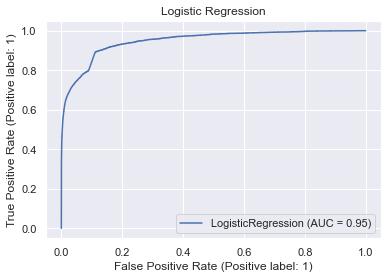

In [39]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('Logistic Regression')
plt.show()

Our model accuracy is 95% which seems very good

#### Saving the Model

In [51]:
import pickle
filename='malignant.pkl'
pickle.dump(lg, open(filename,'wb'))

#### Conclusion

In [52]:
a=np.array(y_test)
pred=np.array(GCV_pred)
malignant=pd.DataFrame({'Actual':a,'Predicted':pred})
malignant

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
47867,0,0
47868,0,0
47869,0,0
47870,0,0


#### Predicting for test dataset

In [43]:
# Replacing '\n' with ' '

df1.comment_text = df1.comment_text.str.replace('\n',' ')

from nltk.tokenize import regexp_tokenize

# Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc

df1.comment_text = df1.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [46]:
df1.head()

,id,comment_text
0,00001cee341fdb12,o bitch a ule is more succesful then you'll ev...
1,0000247867823ef7,rom f he title is fine as it is
2,00013b17ad220c46,ources awe shton on apland
3,00017563c3f7919a,f you have a look back at the source the infor...
4,00017695ad8997eb,don't anonymously edit articles at all


In [47]:
test_data =tf_vec.fit_transform(df1['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2924094 stored elements in Compressed Sparse Row format>

In [53]:
#predicting using the saved model

loaded_model = pickle.load(open(filename, 'rb'))
pred=loaded_model.predict(test_data)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
malignant_comment_prediction=pd.DataFrame(data=df1)
malignant_comment_prediction['Malignant or not']=pred

#### Final Output

In [55]:
malignant_comment_prediction

,id,comment_text,Malignant or not
0,00001cee341fdb12,o bitch a ule is more succesful then you'll ev...,0
1,0000247867823ef7,rom f he title is fine as it is,0
2,00013b17ad220c46,ources awe shton on apland,0
3,00017563c3f7919a,f you have a look back at the source the infor...,0
4,00017695ad8997eb,don't anonymously edit articles at all,0
...,...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but too ...,0
153160,fffd7a9a6eb32c16,hrow from out field to home plate oes it get t...,0
153161,fffda9e8d6fafa9e,kinotorishima categories see your changes and ...,0
153162,fffe8f1340a79fc2,ne of the founding nations of the ermany has a...,0


We sucessfully predict whether thr comment is malignant or not with our best model.